This Jupyter notebook describes the use of **pourbiax** scripts to plot Pourbiax diagram

In [1]:
from Jworkflow.pourbaix import Pourbaix, get_reaction_energy_Gcor

First, import the module for drawing Pourbiax diagram **Pourbiax** and the functions used to load some predefined data **get_reaction_energy_Gcor**.  

To use module **Pourbiax**, three variables need to be passed in:
- reaction: A dictionary stores the phases contained in the phase diagram, as well as the reactants and products corresponding to the reactions that generate those phases
- energy: The energy of the objects in all reactants and products
- correction: The correction of free energy of the objects in all reactants and products

Now get a case study and see what these three variables look like:



In [2]:
reaction, energy, correction = get_reaction_energy_Gcor('ZnO-ASE')
reaction

{'Zn': ('Zn', 'Zn'),
 'Zn+2': ('Zn', 'Znzz(aq) + 2xe'),
 'ZnO': ('Zn + H2O(l)', 'ZnO + 2xH + 2xe'),
 'ZnO2': ('Zn + 2xH2O(l)', 'ZnO2(aq) + 4xH + 4xe'),
 'ZnO2-2': ('Zn + 2xH2O(l)', 'ZnO2ff(aq) + 4xH + 2xe'),
 'ZnOH+': ('Zn + H2O(l)', 'ZnOHz(aq) + 1xH + 2xe'),
 'HZnO2-': ('Zn + 2xH2O(l)', 'HZnO2f(aq) + 3xH + 2xe')}

In [3]:
energy

{'Zn': 0,
 'Znzz': -1.5264164573008816,
 'ZnO': -3.323,
 'ZnO2': -2.921,
 'ZnO2ff': -4.045437252886342,
 'ZnOHz': -3.5207315956891634,
 'HZnO2f': -4.801273583873681,
 'H2O': -2.45831105012463,
 'H': 0.0}

In [4]:
correction

{'Zn': 0,
 'Znzz(aq)': 0,
 'ZnO': 0,
 'ZnO2(aq)': 0,
 'ZnO2ff(aq)': 0,
 'ZnOHz(aq)': 0,
 'HZnO2f(aq)': 0,
 'H2O(l)': 0.0,
 'H': 0.0}

- You can add parentheses after an object to represent its different states. At this time, the final free energy of this object will be the energy of the object without parentheses, plus the correction value with parentheses. For example, if energy = {'CO2': 1}, correction = {'CO2(s)': 0.3, 'CO2(g)' : 1}, G(CO2(s)) = 1 + 0.3 = 1.3, G(CO2(g)) = 1 + 1 = 2.
- Don't name objects with symbol '+' and '*'. These symbols have special meanings in the reaction formula
- If the parentheses contain a string 'aq', an additional free energy correction term for the liquid $RTln(C)$ will be added to the free energy of the object.
- By default, the naming of phases needs to follow the following rules when plotting: all numbers will be converted to superscripts and subscripts. If there is a positive or negative sign before the value, it is a superscript; otherwise, it is a subscript. Setting convert_label to False on Pourbiax.plot to turn off this function.
- Because most of the reference sources directly give the energy of the whole reaction, rather than the calculated energy of each object, the energy and correction terms in the case may be slightly different from those previously stated.

Now, let us check this Pourbiax diagram from [ASE example](https://wiki.fysik.dtu.dk/ase/ase/phasediagram/phasediagram.html).

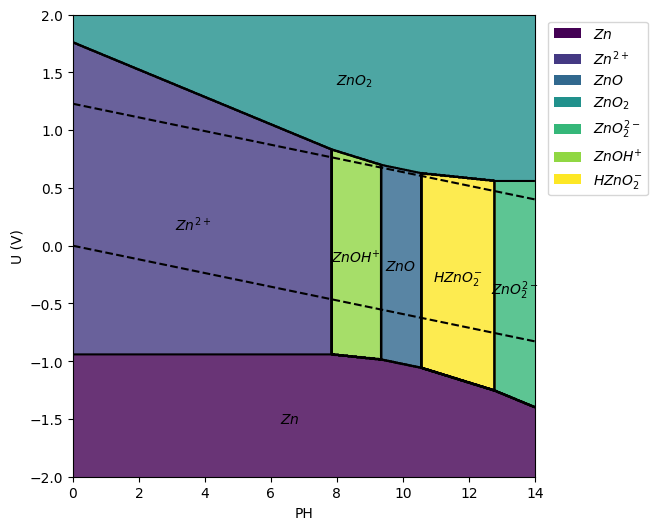

In [5]:
p=Pourbaix(reaction, energy, correction)
p.compute_phase(PH_range=[0, 14], U_range=[-2, 2])
p.plot()
# fig = p.plot()
# from IPython.display import display
# display(fig)

The following are some data from other sources.There are some differences in the reproduction, not sure where the problem is, if you have found welcome to communicate with me.

Pourbiax diagram of ZnO from [PWmat example](http://www.pwmat.com:8080/upload/module/pdf/Pourbaix_diagram.pdf):
By using min_e, you can plot the free energy heatmap rather than phase.

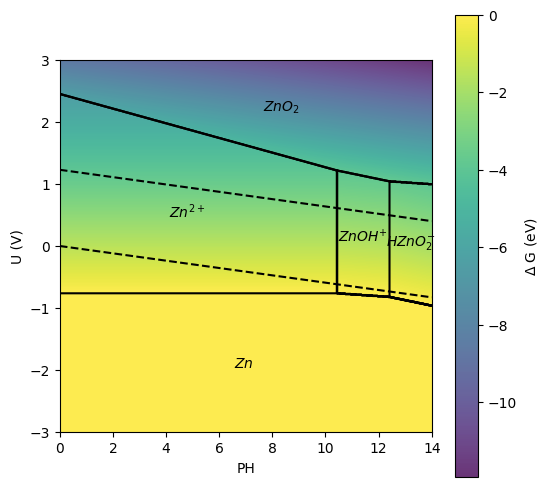

In [10]:
reaction, energy, correction = get_reaction_energy_Gcor('ZnO-PWmat')
p=Pourbaix(reaction, energy, correction)
p.compute_phase(PH_range=[0, 14], U_range=[-3, 3])
p.plot('min_e')

Pourbiax diagram of O and OH adsorb on Mo2C from [paper](https://pubs.acs.org/doi/10.1021/acscatal.4c04878):

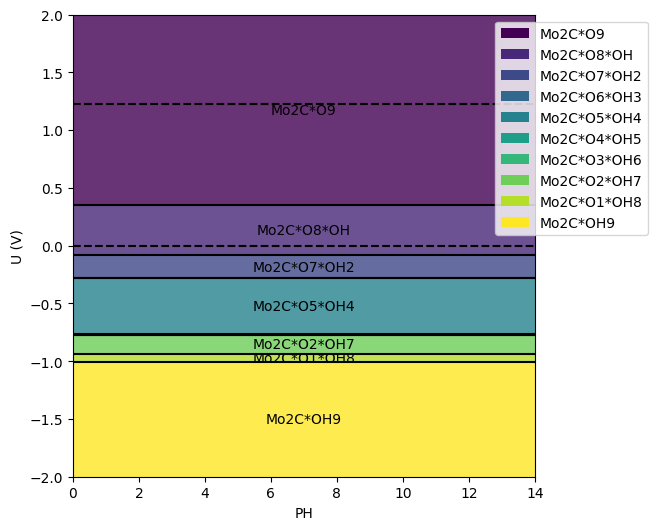

In [8]:
reaction, energy, correction = get_reaction_energy_Gcor('Mo2C*O*OH')
p=Pourbaix(reaction, energy, correction, reference='RHE')
p.compute_phase(PH_range=[0, 14], U_range=[-2, 2])
p.plot(convert_label=False)

Pourbiax diagram of Singal atom catalysis Fe@4N-Gr, Cr@4N-Gr, Co@4N-Gr, Mn@4N-Gr from [paper](https://pubs.acs.org/doi/10.1021/acscatal.3c04801):

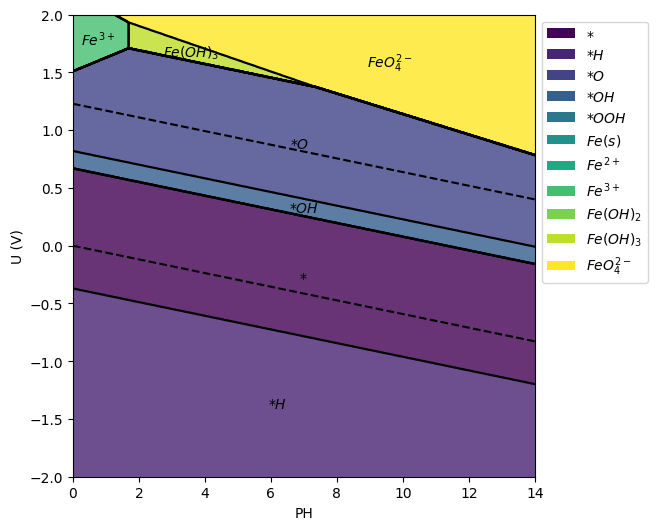

In [9]:
reaction, energy, correction = get_reaction_energy_Gcor('Fe@4N-Gr')
p=Pourbaix(reaction, energy, correction)
p.compute_phase(PH_range=[0, 14], U_range=[-2, 2])
p.plot()